In [6]:
push!(LOAD_PATH, pwd()) # put current directory on path
using Revise
using UnPack
using CooperativeHuntingPkg

[ Info: Precompiling CooperativeHuntingPkg [bb0a82a8-bea2-4e8b-a7d4-ef513daa3692] (cache misses: include_dependency fsize change (4))


In [12]:
params = Dict(
    :α1_of_1 => 0.95,
    :α2_of_1 => 0.05,
    :s1 => 0.5,
    :s2 => 0.3,
    :H1a => 0,
    :H1b => 0.5,
    :H2a => 0,
    :H2b => 0.4,
    :A1 => 0.6,
    :A2 => 0.5,
    :α2_fun_type => "sigmoid"
)

Dict{Symbol, Any} with 11 entries:
  :A1          => 0.6
  :H2b         => 0.4
  :s1          => 0.5
  :H1a         => 0
  :H2a         => 0
  :α2_of_1     => 0.05
  :α2_fun_type => "sigmoid"
  :s2          => 0.3
  :α1_of_1     => 0.95
  :H1b         => 0.5
  :A2          => 0.5

In [13]:
fun_alpha1(1,params)

0.9500000000000001

In [109]:
(;:α1_of_1, :α2_of_1) = params

LoadError: syntax: invalid assignment location "(((parameters (inert α1_of_1) (inert α2_of_1))),)" around In[109]:1

In [105]:
fun_H1(5,params)

0.1

In [41]:
dic2 = (a=1,b=2)

(a = 1, b = 2)

In [27]:
@unpack a,b = dic2

Dict{Symbol, Int64} with 2 entries:
  :a => 1
  :b => 2

In [43]:
dic2.a

1

LoadError: MethodError: no method matching setindex!(::@NamedTuple{a::Int64, b::Int64}, ::Int64, ::Symbol)
The function `setindex!` exists, but no method is defined for this combination of argument types.

In [55]:
u=[1,2,3]

3-element Vector{Int64}:
 1
 2
 3

In [53]:
u[1]

1

In [54]:
u[2]

2

# Going through bifurcationkit tutorial

https://bifurcationkit.github.io/BifurcationKitDocs.jl/dev/gettingstarted/

Example:
$$
\mu + x - \frac{x^3}{3} = 0
$$
for parameter $\mu$, $x \in \mathbb{R}$

We'll start with
$ (x_0, \mu_0) \approx (-2,-1)$

In [62]:
using Pkg
Pkg.add("BifurcationKit")
Pkg.add("LaTeXStrings")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


In [63]:
using BifurcationKit, LaTeXStrings

## Step 1: Define problem

In [64]:
F(x,p) = @.p[1] + x - x^3/3
prob = BifurcationProblem(F, 
    [-2.], #x0
    [-1.], #parameters
    1; #parameter index for continuation
    record_from_solution = (x,p; k...) -> x[1] # control what is recorded from each step
)

┌─ Bifurcation Problem with uType Vector{Float64}
├─ Inplace:  false
├─ Dimension:  1
├─ Symmetric: false
└─ Parameter: p1

## Step 2: Solve problem

In [65]:
br = continuation(prob, PALC(),ContinuationPar(p_min = -1., p_max = 1.))

 ┌─ Curve type: EquilibriumCont
 ├─ Number of points: 54
 ├─ Type of vectors: Vector{Float64}
 ├─ Parameter p1 starts at -1.0, ends at 1.0
 ├─ Algo: PALC
 └─ Special points:

- #  1,       bp at p1 ≈ +0.66666320 ∈ (+0.66666320, +0.66666655), |δp|=3e-06, [converged], δ = ( 1,  0), step =  20
- #  2,       bp at p1 ≈ -0.66666618 ∈ (-0.66666650, -0.66666618), |δp|=3e-07, [converged], δ = (-1,  0), step =  38
- #  3, endpoint at p1 ≈ +1.00000000,                                                                     step =  53


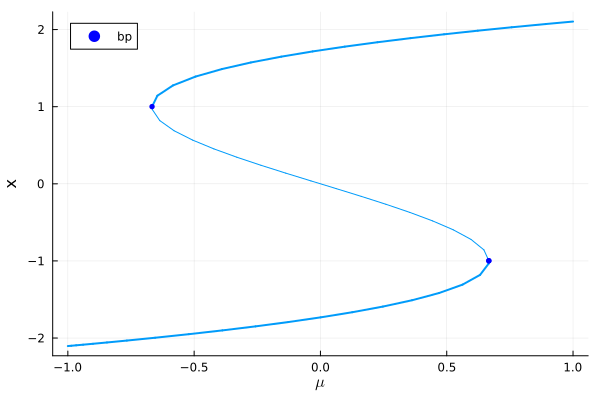

In [69]:
using Plots
scene = plot(br, plotstability = true, xlabel = L"\mu")

### plotting without plot recipe

from https://bifurcationkit.github.io/BifurcationKitDocs.jl/dev/plotting/

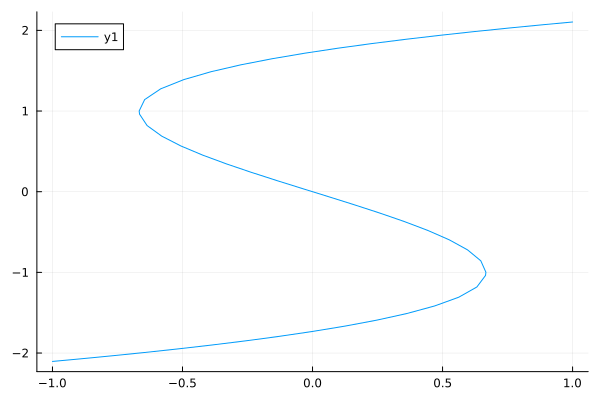

In [70]:
plot(br.branch.param, br.branch.x)

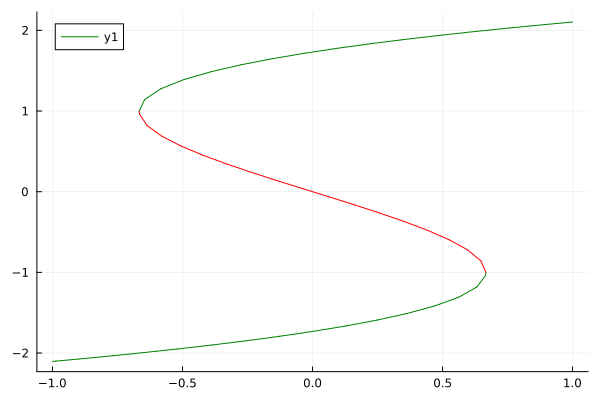

In [71]:
col = [stb ? :green : :red for stb in br.stable]
plot(br.param, br.x, color=col)


## Step 3: Analyze solution

In [8]:
show(br)

 ┌─ Curve type: EquilibriumCont
 ├─ Number of points: 54
 ├─ Type of vectors: Vector{Float64}
 ├─ Parameter p1 starts at -1.0, ends at 1.0
 ├─ Algo: PALC
 └─ Special points:

- #  1,       bp at p1 ≈ +0.66666320 ∈ (+0.66666320, +0.66666655), |δp|=3e-06, [converged], δ = ( 1,  0), step =  20
- #  2,       bp at p1 ≈ -0.66666618 ∈ (-0.66666650, -0.66666618), |δp|=3e-07, [converged], δ = (-1,  0), step =  38
- #  3, endpoint at p1 ≈ +1.00000000,                                                                     step =  53


In [14]:
br[5]

(x = -2.0742612536082805, param = -0.9006164054145794, itnewton = 2, itlinear = 2, ds = 0.04102643120243098, n_unstable = 0, n_imag = 0, stable = true, step = 4, eigenvals = ComplexF64[-3.3025597482205953 + 0.0im], eigenvecs = ComplexF64[1.0 + 0.0im;;])

In [15]:
propertynames(br)

(:branch, :eig, :sol, :contparams, :kind, :prob, :specialpoint, :alg)

# Another continuation example with some branching

Solve 
$$
0 = x \cdot (\mu - x)
$$
"In case we know there are many branches, the best is to use an automatic method to compute them all. We will focus on bifurcationdiagram which computes the connected component of the initial guess in the plane 
(
x
,
μ
)
(x,μ). An alternative is to use Deflated Continuation."

In [39]:
using Plots
using BifurcationKit

Fbp(u,p) = @. u*(p[1]-u) #@. does the broadcasting



Fbp (generic function with 1 method)

In [40]:
# bifurcation problem
prob = BifurcationProblem(Fbp, [0.0], [-0.2],
    # specify continutation parameter index
    1,
    record_from_solution= (x,p; k...) -> x[1])

┌─ Bifurcation Problem with uType Vector{Float64}
├─ Inplace:  false
├─ Dimension:  1
├─ Symmetric: false
└─ Parameter: p1

call bifurcationdiagram to recursively compute branches. here we need 2 recursions because of 2 branches

In [41]:
# options for continuation
opts_br = ContinuationPar(
    # parameter interval
    p_max = 0.2, p_min = -0.2,
    # detect bifurcations with bisection method
    # we increase the precision of the bisection
    n_inversion = 4)

# automatic bifurcation diagram computation
diagram = bifurcationdiagram(prob, PALC(),
    # the following parameter specifes the maximum amount of recursion 
    # for computing branches
    2,
    opts_br,
    )

[Bifurcation diagram]
 ┌─ From 0-th bifurcation point.
 ├─ Children number: 2
 └─ Root (recursion level 1)
      ┌─ Curve type: EquilibriumCont
      ├─ Number of points: 9
      ├─ Type of vectors: Vector{Float64}
      ├─ Parameter p1 starts at -0.2, ends at 0.2
      ├─ Algo: PALC
      └─ Special points:

- #  1,       bp at p1 ≈ +0.00108349 ∈ (-0.00333593, +0.00108349), |δp|=4e-03, [converged], δ = ( 1,  0), step =   6
- #  2, endpoint at p1 ≈ +0.20000000,                                                                     step =   8


In [51]:
plot(diagram.branches[1])

LoadError: type BifDiagNode has no field branches

## Example 3: continuing periodic orbits:

Stuart-Laundau oscillator:
$$
\frac{du}{dt} = ru - \nu v - (u^2 + v^2)(c_3u - \mu v) 
$$
$$
\frac{dv}{dt} = rv + \nu v - (u^2 + v^2)(c_3 + \mu u)
$$

In [14]:
a

1

In [15]:
using BifurcationKit, Plots

function Fsl(X,p)
    (;r, μ, ν, c3) = p
    u, v = X
    ua = u^2 + v^2
    [
        r * u - ν * v - ua * (c3 * u - μ * v)
        r * v + ν * u - ua * (c3 * v + μ * u)
    ]
end

Fsl (generic function with 1 method)

In [21]:
par_sl = (r=0.1, μ = 0., ν = 1.0, c3 = 1.0)
u0 = zeros(2) # start continuation at (0,0)
prob = BifurcationProblem(Fsl, u0, par_sl, 
    #  I think the following chooses r as the bifurcation parameter
    (@optic _.r))

# we want to locate a Hopf Bifurcation
br = continuation(prob, PALC(), ContinuationPar(), 
    # bothside = true means "compute the branches on the 
    # 2 sides of the initial parameter value p0, merge them and return it." (from ?continuation)
    bothside = true)

 ┌─ Curve type: EquilibriumCont
 ├─ Number of points: 25
 ├─ Type of vectors: Vector{Float64}
 ├─ Parameter r starts at -1.0, ends at 1.0
 ├─ Algo: PALC
 └─ Special points:

- #  1, endpoint at r ≈ -1.00000000,                                                                     step =   0
- #  2,     hopf at r ≈ -0.00595553 ∈ (-0.00595553, +0.00299379), |δp|=9e-03, [converged], δ = ( 2,  2), step =   8
- #  3, endpoint at r ≈ +1.00000000,                                                                     step =  24


A hopf is detected! So we want the branch of periodic orbits nearby

To do this, we have to provide to continuation: 
* the branch br
* the special point to branch from (2 here)
* a method: PeriodicOrbitOCollProblem(20, 5) (WHAT DO THE NUMBERS MEAN?)
the number 20 is Ntst, and 5 is m... from looking athte documentation. i think these are for determining the size of two meshes in the collocation method

In [23]:
br_po = continuation(br, 2, ContinuationPar(),
    PeriodicOrbitOCollProblem(20,5)
    )

┌ Warning: We did not find the left eigenvalue for the Hopf point to be very close to the imaginary part:
│ λ  ≈ -0.00595553174342172 + 1.0im,
│ λ★ ≈ -0.00595553174342172 - 1.0im
│ You can perhaps increase the number of computed eigenvalues, the current number is nev = 2
└ @ BifurcationKit ~/.julia/packages/BifurcationKit/Eq8JI/src/NormalForms.jl:948


 ┌─ Curve type: PeriodicOrbitCont from Hopf bifurcation point.
 ├─ Number of points: 15
 ├─ Type of vectors: Vector{Float64}
 ├─ Parameter r starts at 0.00404446825657828, ends at 1.0
 ├─ Algo: PALC
 └─ Special points:

- #  1, endpoint at r ≈ +1.00000000,                                                                     step =  14


In [24]:
br_po[1]

(max = 0.06359613398726559, min = -0.06359613398726559, amplitude = 0.12719226797453118, period = 6.283185307179592, param = 0.00404446825657828, itnewton = 0, itlinear = 0, ds = 0.01, n_unstable = 0, n_imag = 0, stable = true, step = 0, eigenvals = ComplexF64[-9.729994587862209e-12 + 0.0im, -0.05082428707935851 + 0.0im], eigenvecs = nothing)

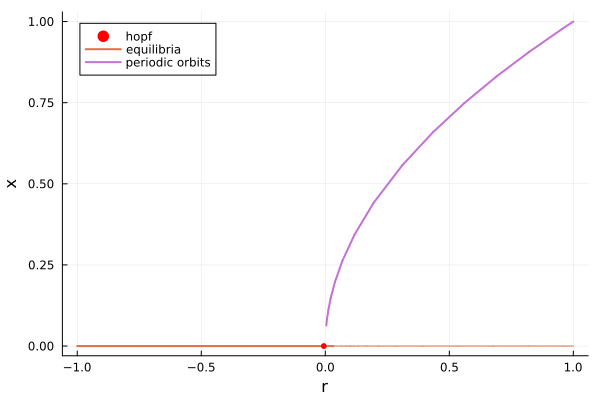

In [26]:
plot(br, br_po, branchlabel = ["equilibria", "periodic orbits"])

**is the purple line the upper limitof the periodic orbits? or the amplitude?**

In [28]:
br_po

 ┌─ Curve type: PeriodicOrbitCont from Hopf bifurcation point.
 ├─ Number of points: 15
 ├─ Type of vectors: Vector{Float64}
 ├─ Parameter r starts at 0.00404446825657828, ends at 1.0
 ├─ Algo: PALC
 └─ Special points:

- #  1, endpoint at r ≈ +1.00000000,                                                                     step =  14


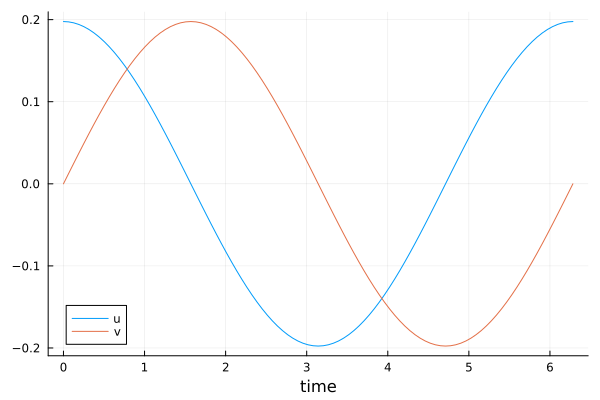

In [33]:
sol0 = get_periodic_orbit(br_po,5)
plot(sol0.t, sol0[1,:], label = "u", xlabel = "time")
plot!(sol0.t, sol0[2,:], label = "v", xlabel = "time")

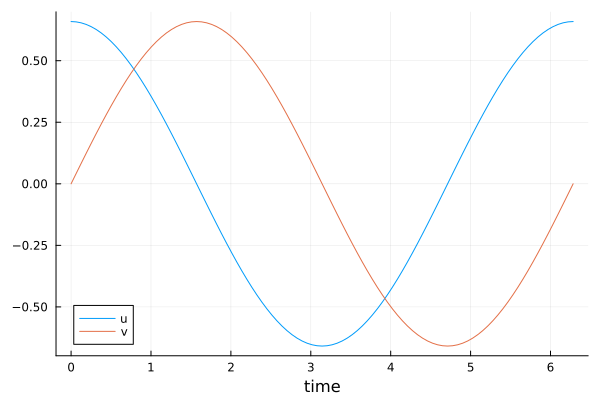

In [34]:
sol = get_periodic_orbit(br_po,10)
plot(sol.t, sol[1,:], label = "u", xlabel = "time")
plot!(sol.t, sol[2,:], label = "v", xlabel = "time")

In [27]:
?get_periodic_orbit

search: get_periodic_orbit getpredictor getperiod



```julia
get_periodic_orbit(prob, u, p)

```

Compute the full periodic orbit associated to `x`. Mainly for plotting purposes.

---

```julia
get_periodic_orbit(prob, u, p)

```

Compute the full periodic orbit associated to `x`. Mainly for plotting purposes.

---

```julia
get_periodic_orbit(prob, x, par; kode...)

```

Compute the full periodic orbit associated to `x`. Mainly for plotting purposes.

---

```julia
get_periodic_orbit(prob, x_bar, p)

```

Compute the full periodic orbit associated to `x`. Mainly for plotting purposes.
